La normalisation des données est cruciale lors de l'entraînement des réseaux neuronaux car elle permet de standardiser les caractéristiques de l'ensemble de données, garantissant que les données d'entrée se trouvent dans une plage de valeurs cohérente. Ce processus aide à l'entraînement du réseau neuronal de plusieurs manières :

1. **Meilleure convergence :** La normalisation des données évite à une caractéristique de dominer ou d'avoir une plus grande influence sur l'entraînement du modèle en raison de son échelle plus importante. Cela permet à l'algorithme d'optimisation de converger plus rapidement, rendant le processus d'entraînement plus efficace.

2. **Amélioration de la généralisation :** La normalisation des données aide à éviter le surajustement en garantissant que le réseau neuronal n'apprend pas des poids spécifiques qui sont optimaux uniquement pour l'ensemble de données d'entraînement donné, mais qui ne se généralisent pas bien à de nouvelles données non vues.

3. **Stabilité et efficacité :** La normalisation des données conduit souvent à un processus d'entraînement plus stable en évitant les instabilités numériques qui peuvent survenir dans les algorithmes d'optimisation en raison d'échelles de caractéristiques importantes ou variables.

Différentes variantes de normalisation des données comprennent :

1. **Mise à l'échelle Min-Max (normalisation) :** Cette méthode met l'échelle des données dans une plage fixe, généralement entre 0 et 1. Elle consiste à soustraire la valeur minimale de chaque point de données, puis à diviser par la différence entre la valeur maximale et minimale. La formule est :
   
   $$ X_{\text{normalisé}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

2. **Standardisation (normalisation Z-score) :** La standardisation transforme les données pour avoir une moyenne de 0 et un écart-type de 1. Elle soustrait la valeur moyenne de chaque point de données et la divise par l'écart-type. La formule est :
   
   $$ X_{\text{standardisé}} = \frac{X - \mu}{\sigma} $$
   
   Ici, $ \mu $ représente la moyenne de la caractéristique et $ \sigma $ représente l'écart-type.

3. **Échelle robuste :** Cette méthode met à l'échelle les caractéristiques en utilisant des statistiques robustes aux valeurs aberrantes. Elle soustrait la médiane et divise par l'écart interquartile (différence entre les 75e et 25e percentiles) plutôt que les valeurs minimale et maximale. Cela la rend adaptée lorsque l'ensemble de données contient des valeurs aberrantes.

4. **Mise à l'échelle du vecteur unitaire :** Cette technique normalise chaque échantillon pour avoir une longueur de 1 (norme unitaire). Elle met à l'échelle chaque point de données de sorte que la longueur euclidienne (norme L2) du vecteur soit égale à 1.

Le choix de la méthode de normalisation dépend de la nature des données, de la présence de valeurs aberrantes et des besoins du modèle de réseau neuronal utilisé. L'expérimentation avec différentes méthodes de normalisation peut aider à déterminer celle qui convient le mieux à un ensemble de données particulier et à une architecture de modèle.

In [ ]:
import numpy as np
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"

data_folder = '~/data/FMNIST' # This can be any directory you want
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Define hyperparameters
input_size = 28 * 28  # Fashion MNIST image size
hidden_size = 1000
num_classes = 10



In [ ]:
# Define hyperparameters
learning_rate = 0.001
num_epochs = 10

criterion = nn.CrossEntropyLoss()


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])


In [ ]:
0,255 / 0,1

In [ ]:
# Initialisation des listes pour stocker les valeurs d'exactitude (accuracy)
valeurs_exactitude_train =  {u:[] for u in range(2)}
valeurs_exactitude_val = {u:[] for u in range(2)}

In [ ]:
for train_idx,do_transofrm in enumerate([True, False]):

  # Define the transformation to apply to the dataset

  if do_transofrm:
    print('----------Avec Une Normalisation des données')
    # Load Fashion MNIST dataset
    trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

  else:
    print('----------Sans Une Normalisation des données')
    trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True,transform=transforms.Compose([transforms.PILToTensor()]))
    testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True,transform=transforms.Compose([transforms.PILToTensor()]))
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
  testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)




  # Initialize the model, loss function, and optimizer
  model = MLP(input_size, hidden_size, num_classes).cuda()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # Entraînement du modèle
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      correct_train = 0
      total_train = 0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          inputs, labels =inputs.cuda().float(), labels.cuda()
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_train += labels.size(0)
          correct_train += (predicted == labels).sum().item()

      exactitude_train = 100 * correct_train / total_train
      valeurs_exactitude_train[train_idx].append(exactitude_train)

      # Validation
      model.eval()
      correct_val = 0
      total_val = 0
      with torch.no_grad():
          for data in testloader:
              images, labels = data
              images, labels =images.cuda().float(), labels.cuda()
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

      exactitude_val = 100 * correct_val / total_val
      valeurs_exactitude_val[train_idx].append(exactitude_val)

      print(f"Époque [{epoch+1}/{num_epochs}] - Perte : {running_loss / len(trainloader):.4f} - Exactitude Entraînement : {exactitude_train:.2f}% - Exactitude Validation : {exactitude_val:.2f}%")




----------Avec Une Normalisation des données
Époque [1/10] - Perte : 0.4767 - Exactitude Entraînement : 82.72% - Exactitude Validation : 82.33%
Époque [2/10] - Perte : 0.3553 - Exactitude Entraînement : 86.93% - Exactitude Validation : 87.02%
Époque [3/10] - Perte : 0.3202 - Exactitude Entraînement : 88.28% - Exactitude Validation : 86.89%
Époque [4/10] - Perte : 0.2949 - Exactitude Entraînement : 89.05% - Exactitude Validation : 87.96%
Époque [5/10] - Perte : 0.2768 - Exactitude Entraînement : 89.73% - Exactitude Validation : 88.40%
Époque [6/10] - Perte : 0.2619 - Exactitude Entraînement : 90.14% - Exactitude Validation : 87.69%
Époque [7/10] - Perte : 0.2504 - Exactitude Entraînement : 90.64% - Exactitude Validation : 88.44%
Époque [8/10] - Perte : 0.2398 - Exactitude Entraînement : 91.04% - Exactitude Validation : 88.42%
Époque [9/10] - Perte : 0.2288 - Exactitude Entraînement : 91.53% - Exactitude Validation : 88.34%
Époque [10/10] - Perte : 0.2193 - Exactitude Entraînement : 91.7

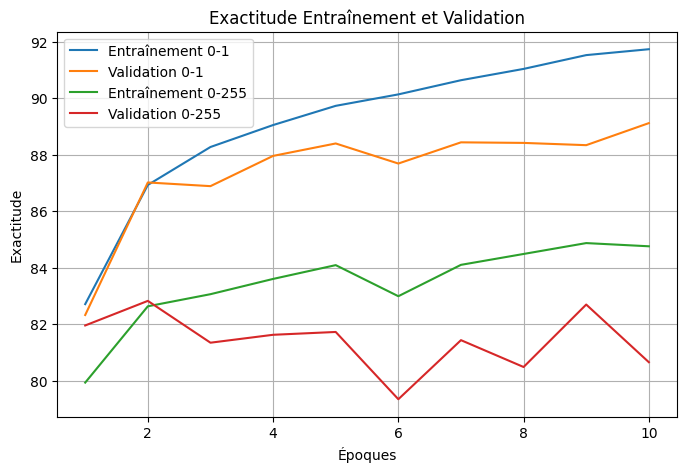

In [ ]:
plt.figure(figsize=(8, 5))
for idx_u,u in enumerate(['0-1','0-255']):
  # Tracé de l'exactitude à chaque époque pour les ensembles d'entraînement et de validation

  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_train[idx_u], label='Entraînement '+u)
  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_val[idx_u], label='Validation '+u)
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.title('Exactitude Entraînement et Validation')
plt.legend()
plt.grid(True)
plt.show()